In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings(action = 'ignore')

In [9]:
data = pd.read_csv(r'C:\Users\Lenovo\Downloads\SuperMarket Analysis.csv')


In [13]:
data.shape
data.head
data.info
data.dtypes


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Sales                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [15]:
data.describe(include = 'number').T

count        mean           std        min  \
Unit price               1000.0   55.672130  2.649463e+01  10.080000   
Quantity                 1000.0    5.510000  2.923431e+00   1.000000   
Tax 5%                   1000.0   15.379369  1.170883e+01   0.508500   
Sales                    1000.0  322.966749  2.458853e+02  10.678500   
cogs                     1000.0  307.587380  2.341765e+02  10.170000   
gross margin percentage  1000.0    4.761905  6.131498e-14   4.761905   
gross income             1000.0   15.379369  1.170883e+01   0.508500   
Rating                   1000.0    6.972700  1.718580e+00   4.000000   

                                25%         50%         75%          max  
Unit price                32.875000   55.230000   77.935000    99.960000  
Quantity                   3.000000    5.000000    8.000000    10.000000  
Tax 5%                     5.924875   12.088000   22.445250    49.650000  
Sales                    124.422375  253.848000  471.350250  1042.650000  
cogs                     118.497500  241.760000  448.905000   993.000000  
gross margin percentage    4.761905    4.761905    4.761905     4.761905  
gross income               5.924875   12.088000   22.445250    49.650000  
Rating                     5.500000    7.000000    8.500000    10.000000

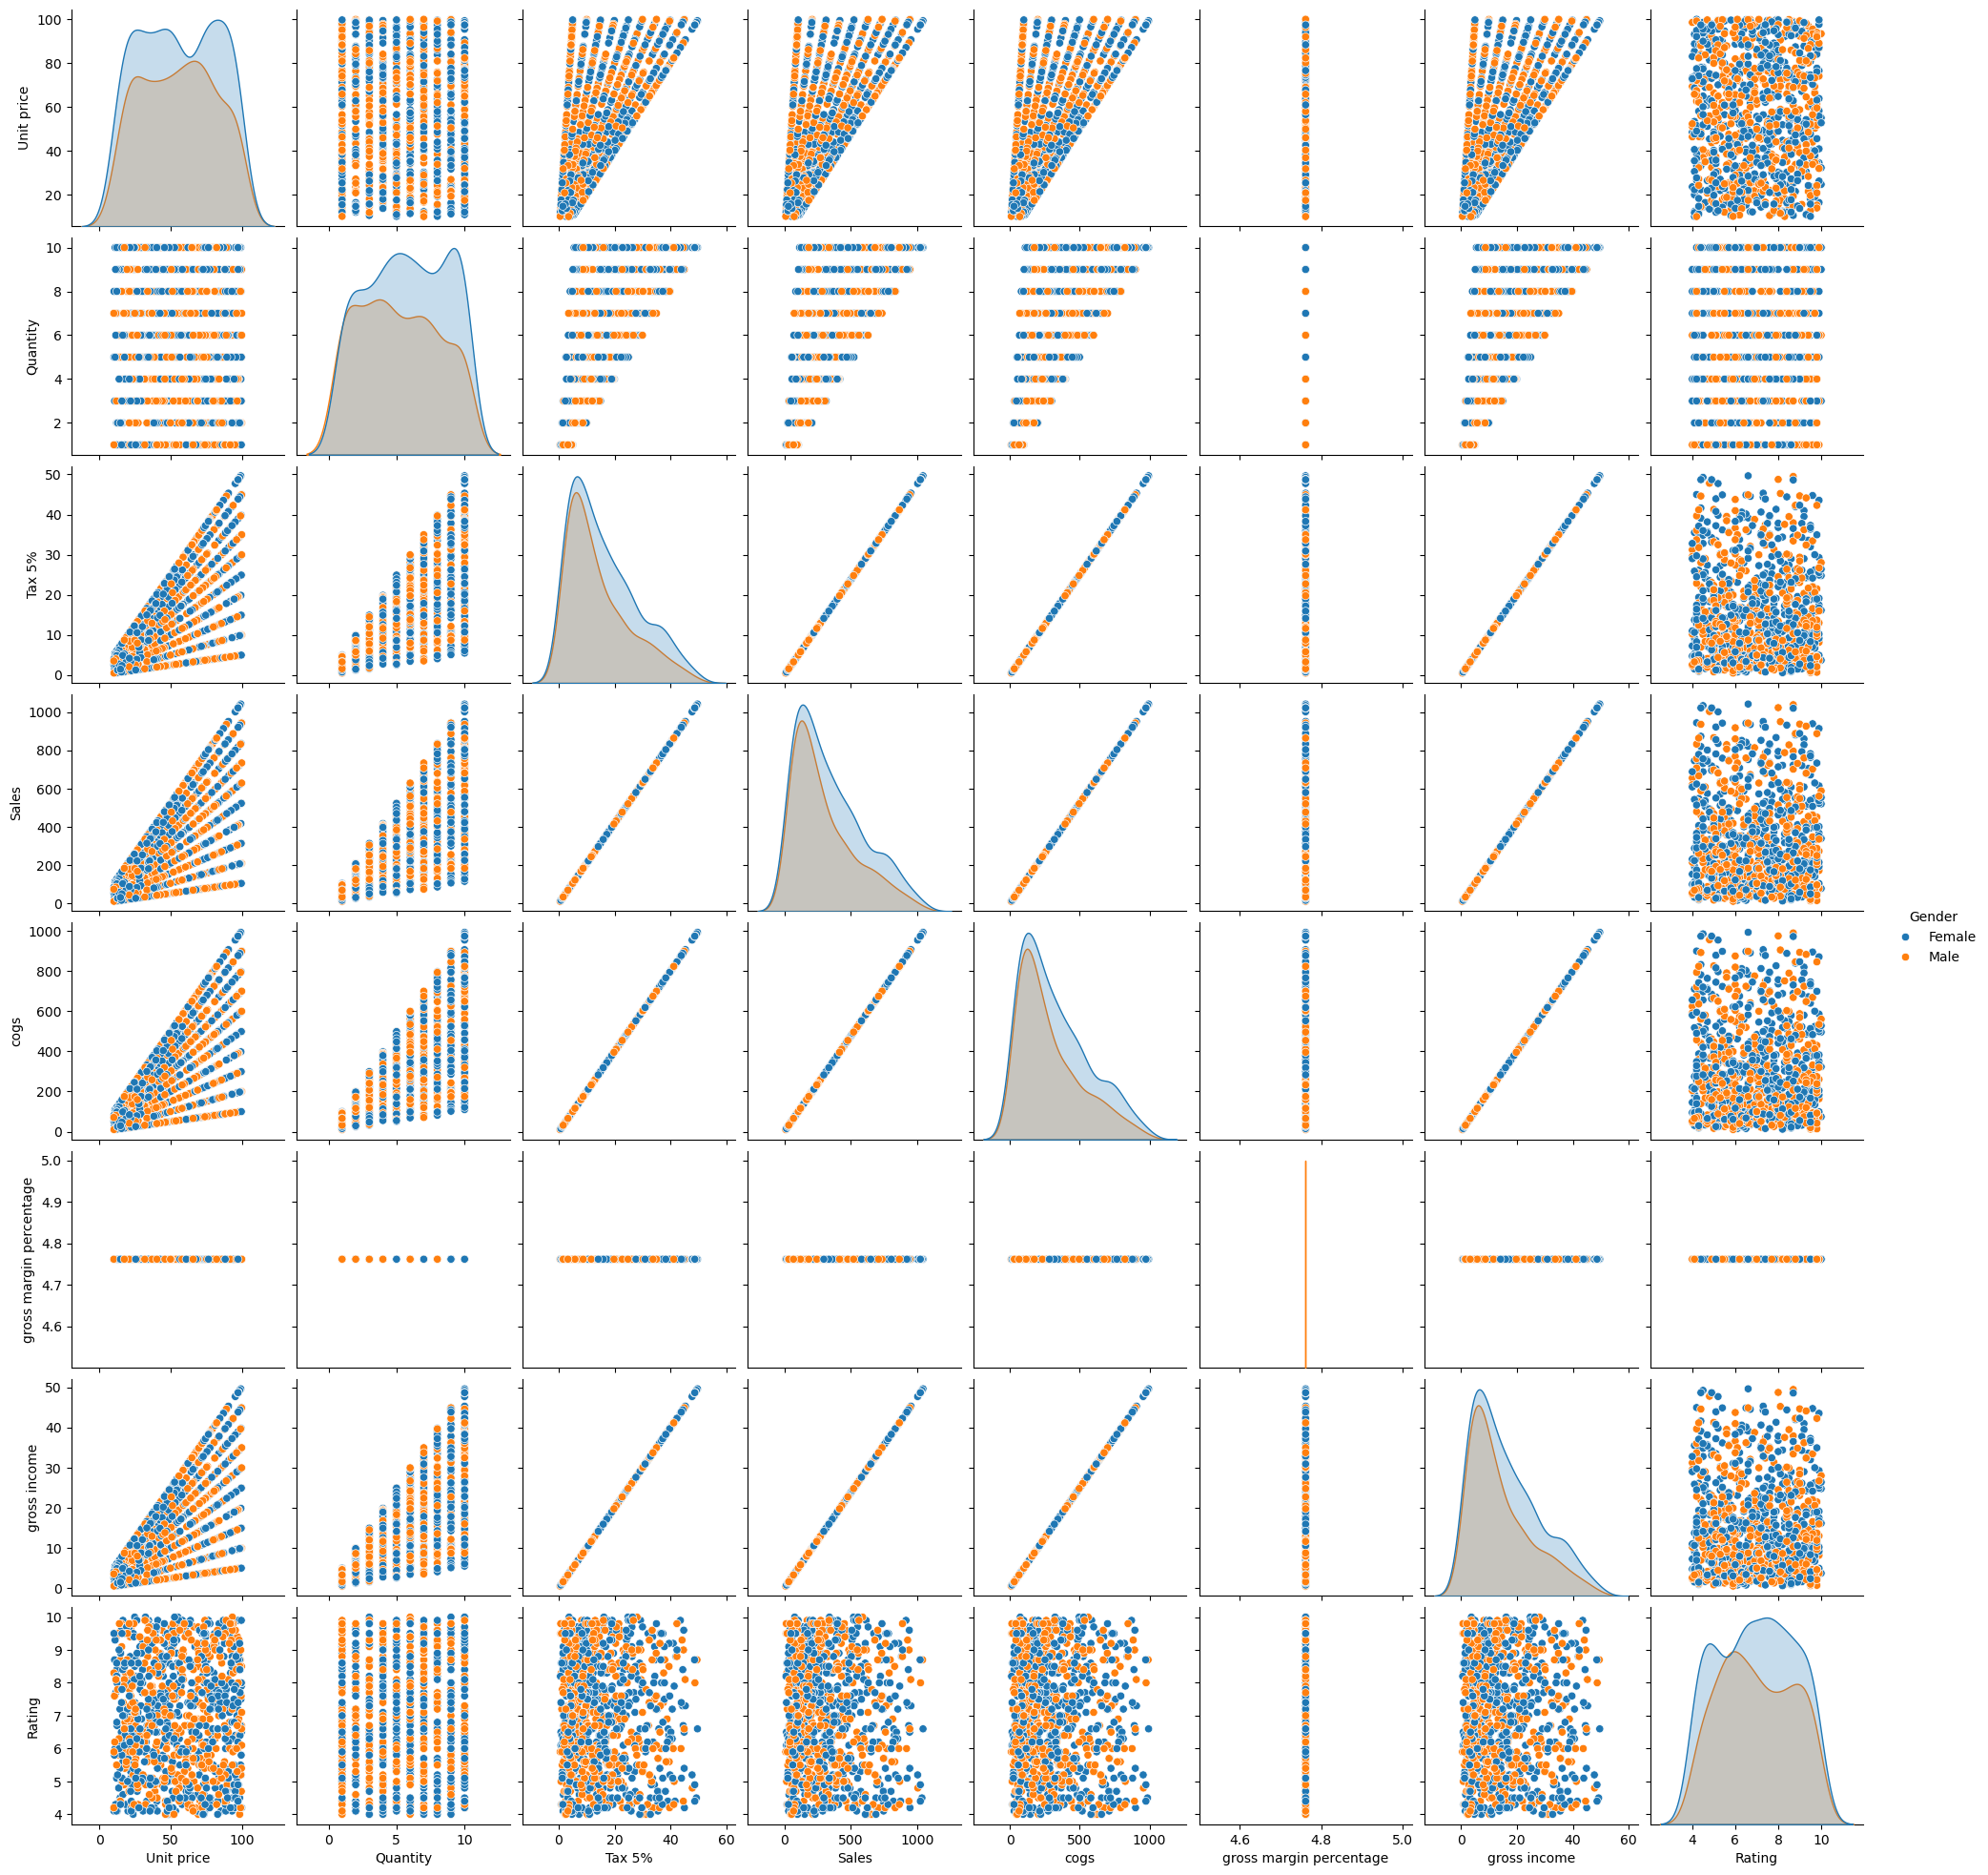

In [19]:
sns.pairplot(data, hue = 'Gender')
plt.show()

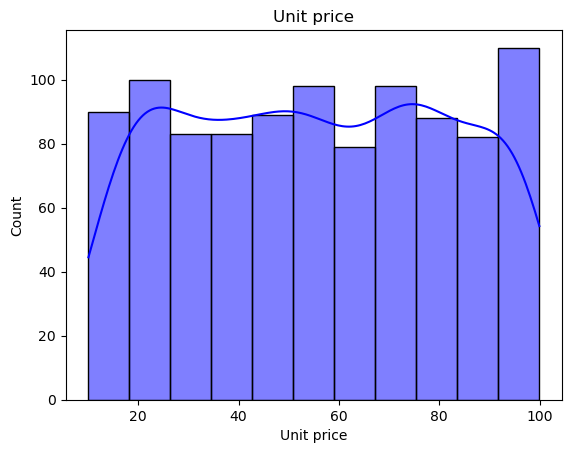

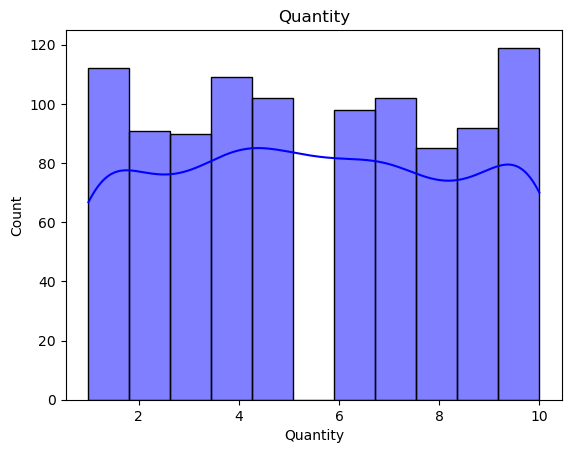

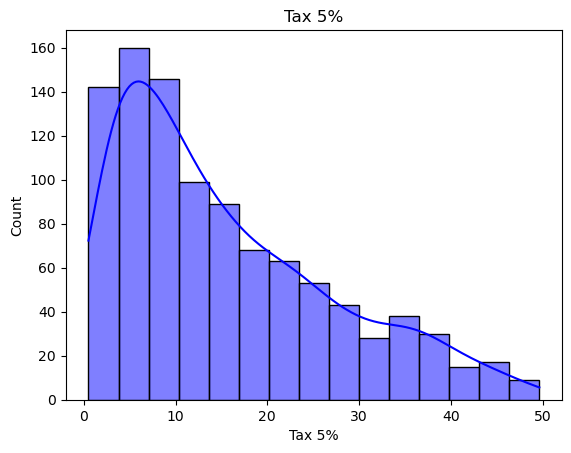

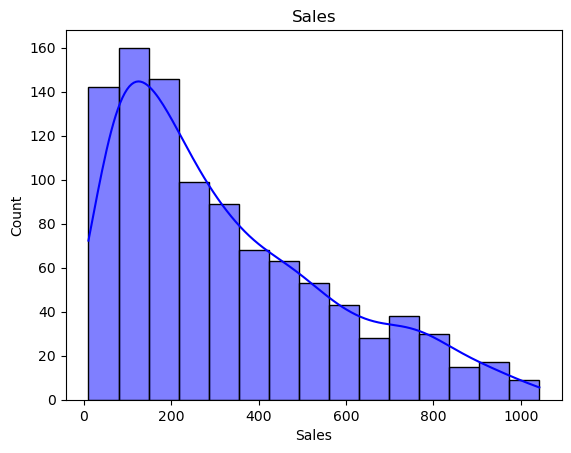

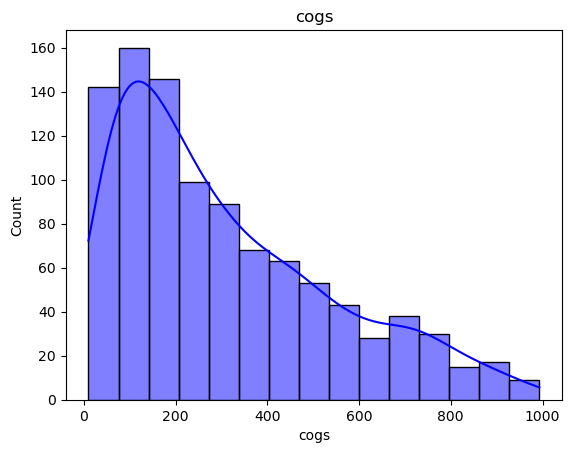

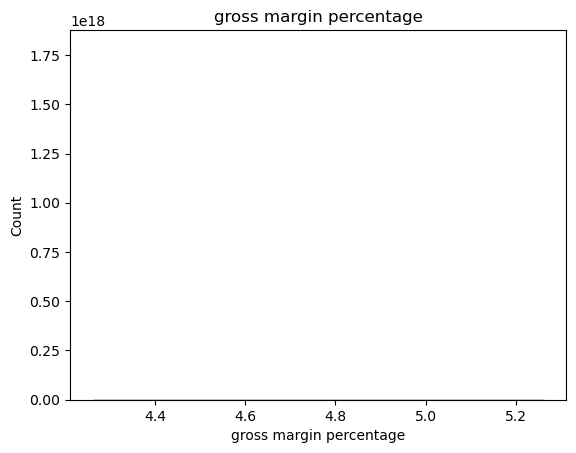

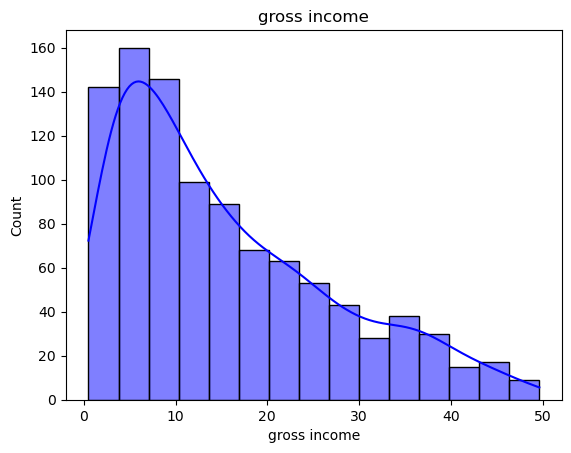

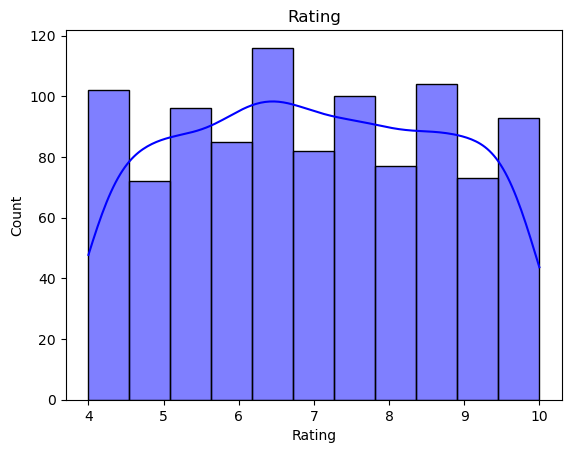

In [21]:
for i in data.select_dtypes(include = 'number').columns:
    sns.histplot(data = data, x = i, kde = True, color = 'blue')
    plt.title(f'{i}')
    plt.show()

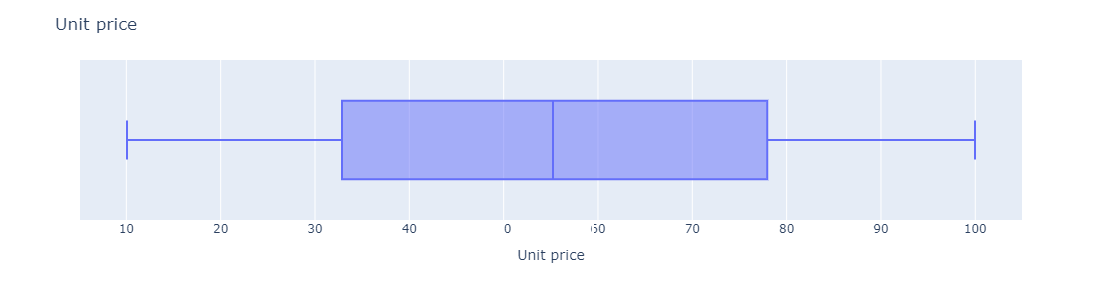

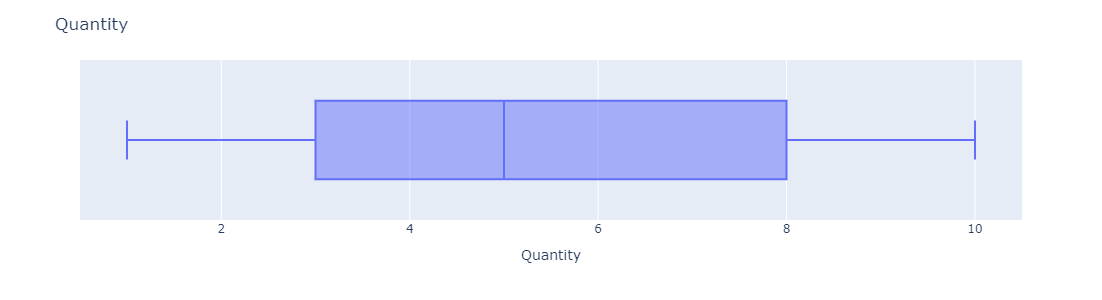

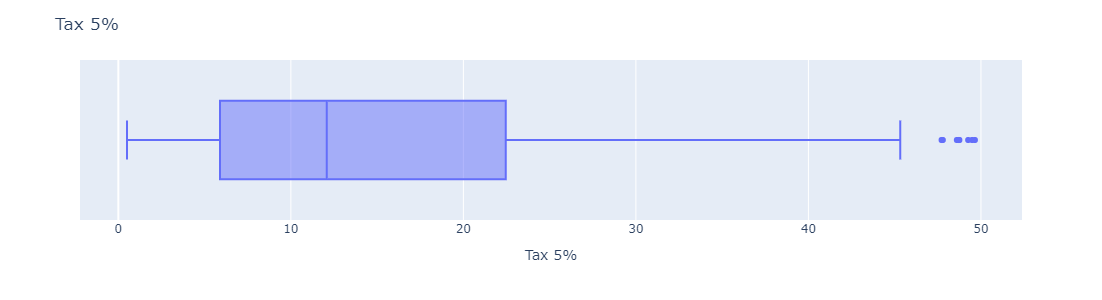

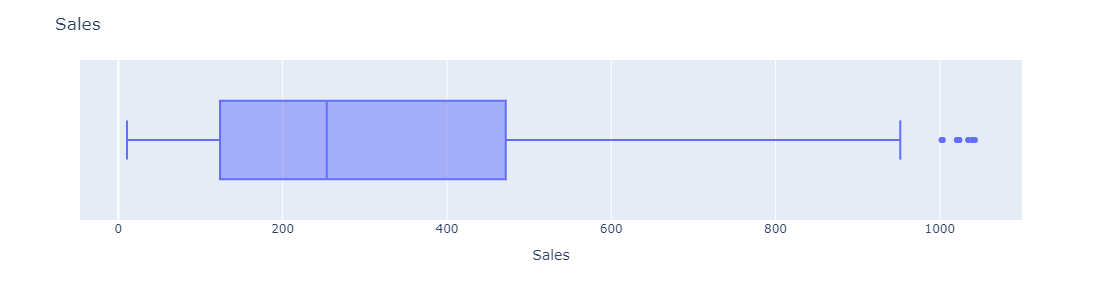

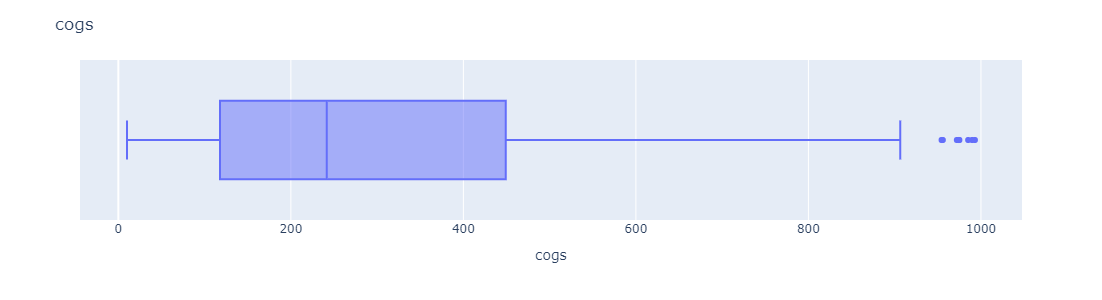

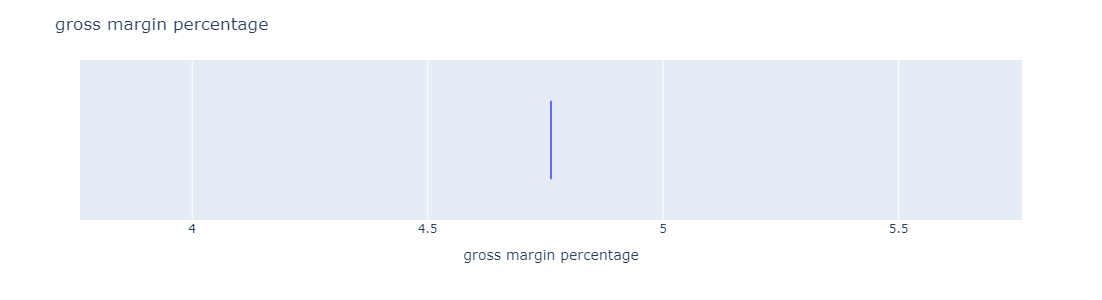

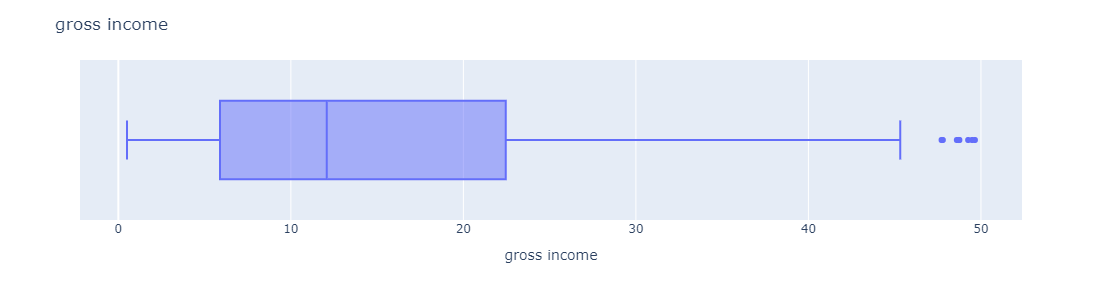

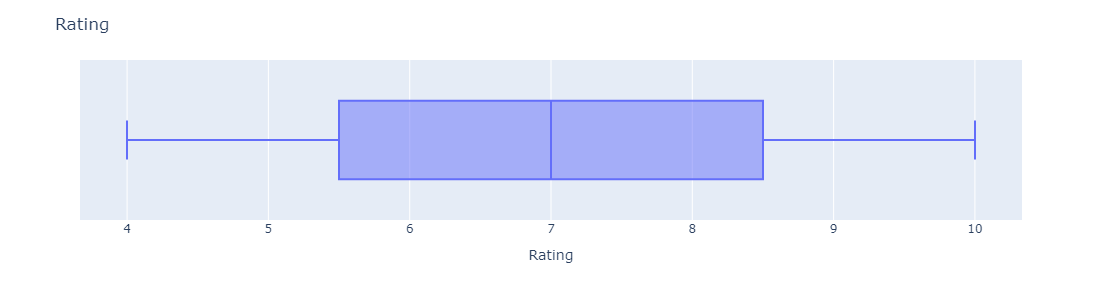

In [23]:
for i in data.select_dtypes(include = 'number').columns:
    fig = px.box(data, x = i)
    fig.update_layout(
    title = f'{i}',
    height = 300,
    width = 600
    )
    fig.show()

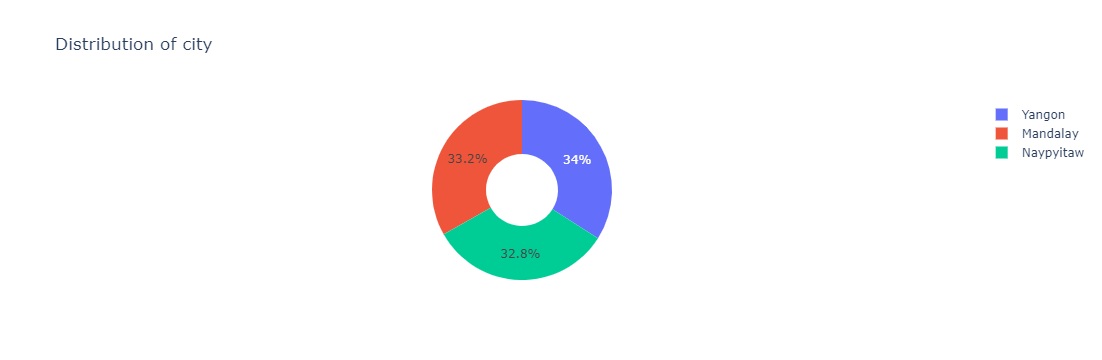

In [25]:
fig = px.pie(data, names = 'City',
            title = 'Distribution of city',
            hole = 0.4)
fig.show()

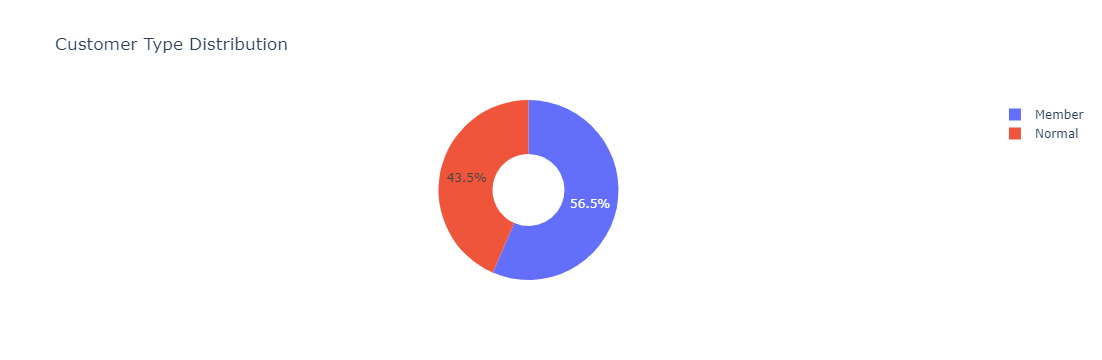

In [27]:
fig = px.pie(data, names = 'Customer type',
            hole = 0.4,
            title = 'Customer Type Distribution')
fig.show()

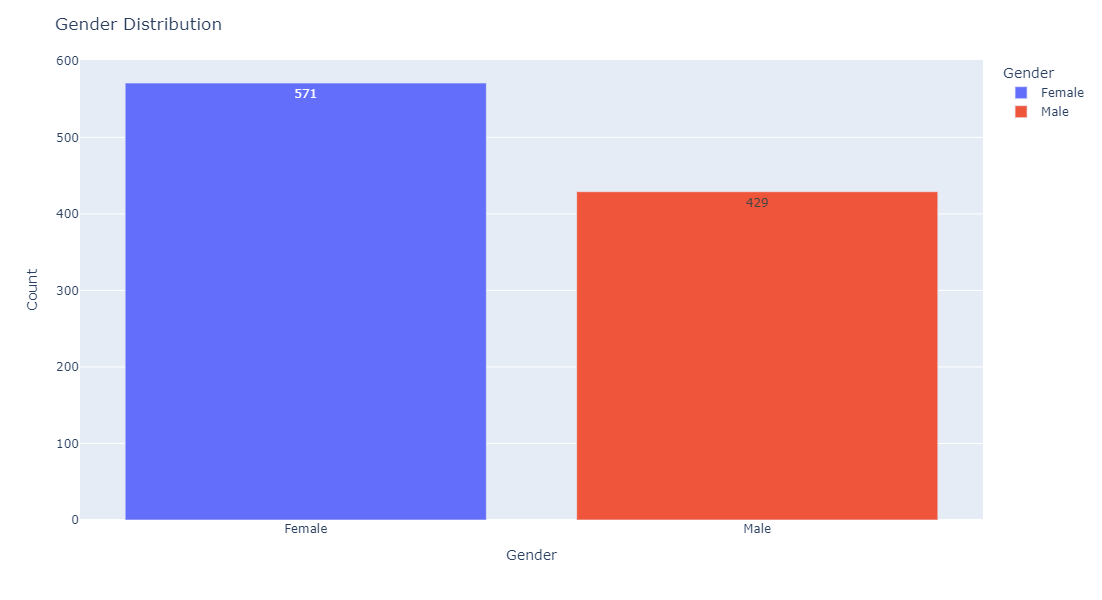

In [29]:
Gender_distribution = data['Gender'].value_counts().reset_index()
Gender_distribution.columns = ['Gender','Count']
fig = px.bar(Gender_distribution,
            x = 'Gender', y = 'Count',
            color = 'Gender',
            text_auto = True)
fig.update_layout(
title = 'Gender Distribution',
height = 600,
width = 800
)
fig.show()

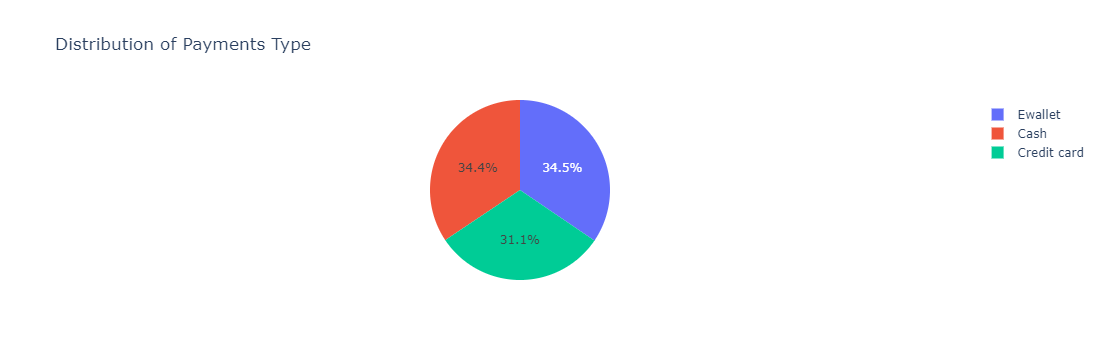

In [31]:
fig = px.pie(data, names = 'Payment',
            title = 'Distribution of Payments Type')
fig.show()

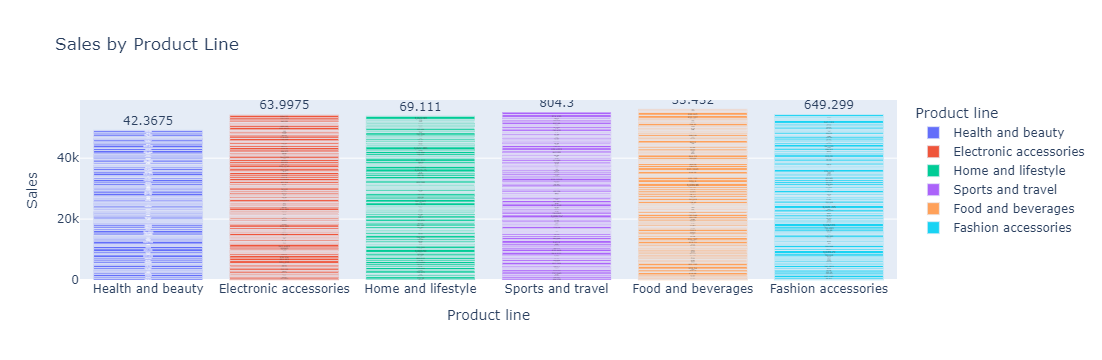

In [35]:
fig = px.bar(data, x = 'Product line', 
             y = 'Sales',
             title = 'Sales by Product Line',
             color = 'Product line',
             text_auto = True)
fig.show()


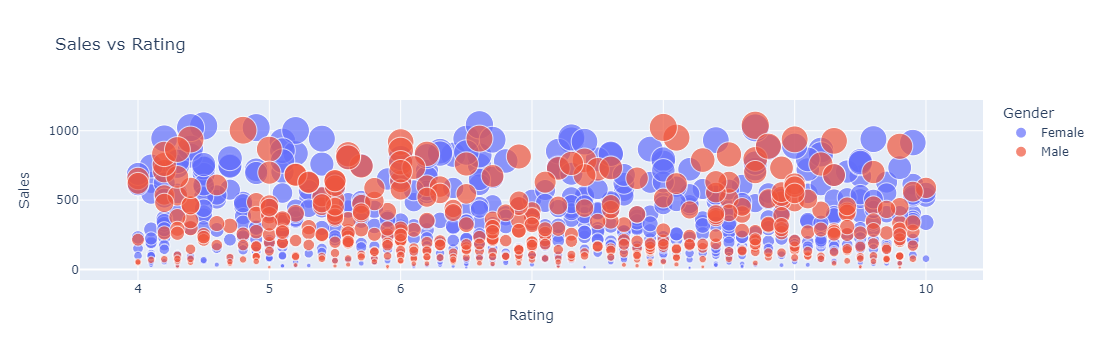

In [37]:
fig = px.scatter(data, x = 'Rating', 
                 y = 'Sales',
                 title = 'Sales vs Rating',
                 color = 'Gender', 
                 size = 'Sales', 
                 hover_name = 'Product line')
fig.show()


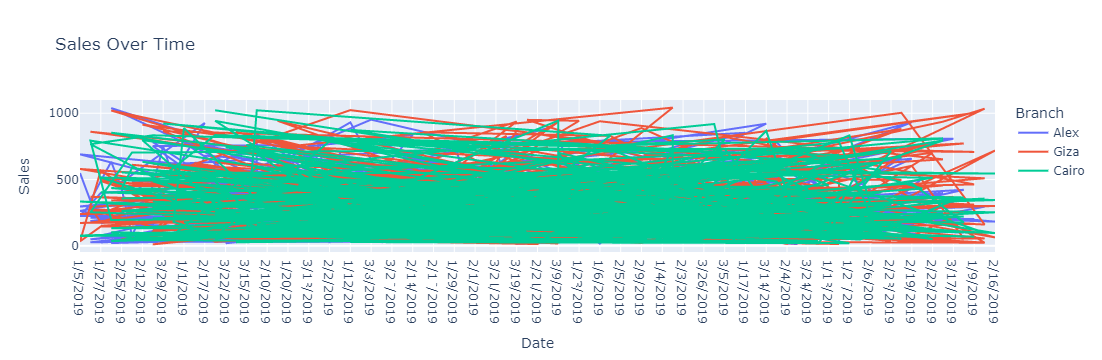

In [39]:
fig = px.line(data, x = 'Date', 
              y = 'Sales',
              title = 'Sales Over Time',
              color = 'Branch')  
fig.show()

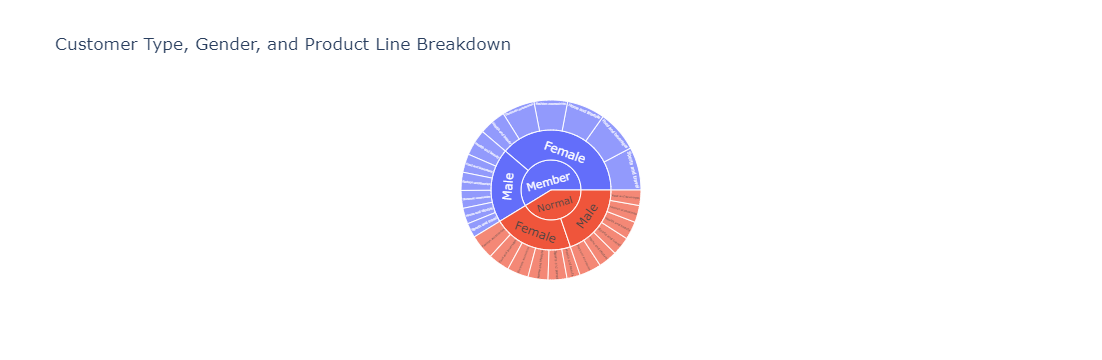

In [41]:
fig = px.sunburst(data, path = ['Customer type', 'Gender', 'Product line'], 
                  values = 'Sales', 
                  title = 'Customer Type, Gender, and Product Line Breakdown')
fig.show()

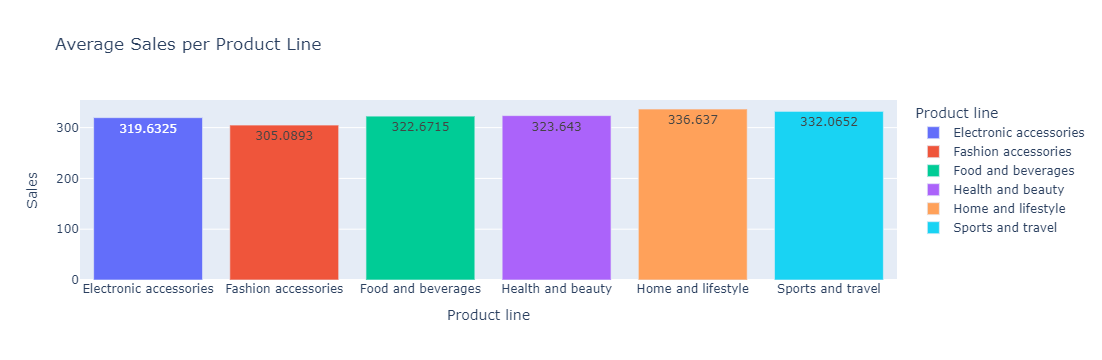

In [43]:
fig = px.bar(data.groupby('Product line')['Sales'].mean().reset_index(),
             x = 'Product line', 
             y = 'Sales',
             title = 'Average Sales per Product Line',
             color = 'Product line',
             text_auto = True)
fig.show()

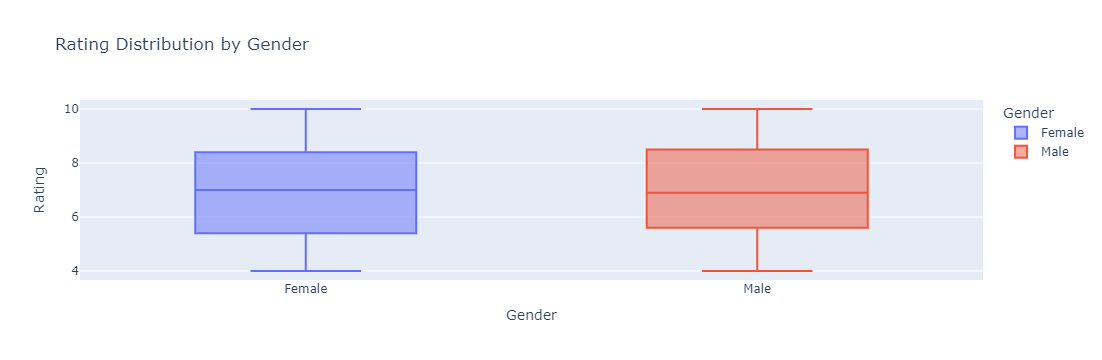

In [45]:
fig = px.box(data, x = 'Gender', 
             y = 'Rating', 
             title = 'Rating Distribution by Gender', 
             color = 'Gender')
fig.show()

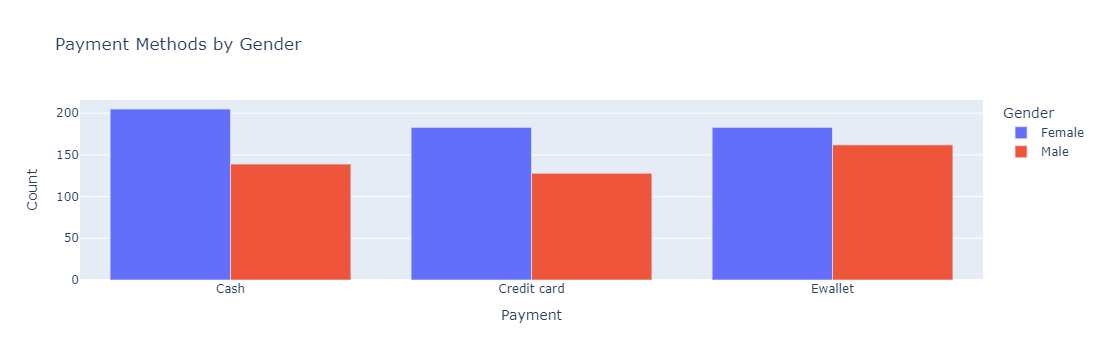

In [47]:
fig = px.bar(data.groupby(['Payment', 'Gender']).size().reset_index(name='Count'),
             x = 'Payment', y = 'Count',
             color = 'Gender', 
             barmode = 'group',
             title = 'Payment Methods by Gender')
fig.show()

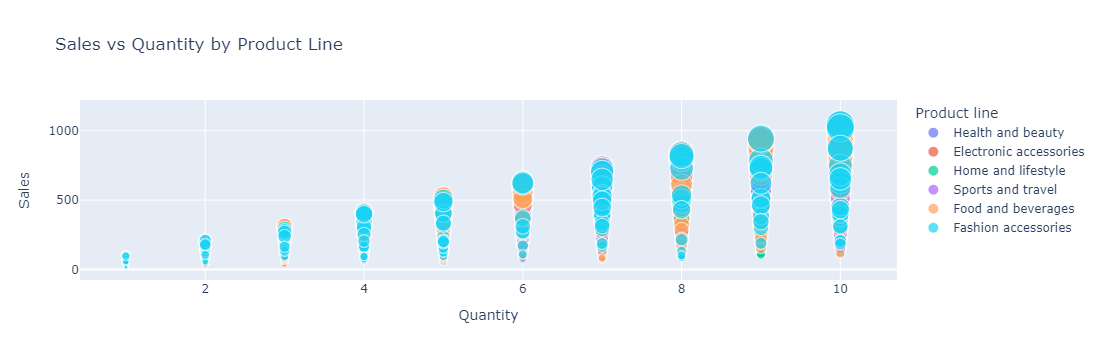

In [49]:
fig = px.scatter(data, x = 'Quantity', 
                 y = 'Sales', 
                 color = 'Product line', 
                 title = 'Sales vs Quantity by Product Line',
                 size = 'Sales', 
                 hover_name = 'Product line')
fig.show()